In [101]:
import pyarrow.parquet as pq
import pandas as pd
# Specify the paths for the test and train Parquet files
test_file_path = r'C:\Users\ASUS\OneDrive\Desktop\deep learning\relevance_test.parquet'  # Test file path
train_file_path = r'C:\Users\ASUS\OneDrive\Desktop\deep learning\relevance_train.parquet'  # Train file path


In [3]:
# Read the test file into a PyArrow Table
test_table = pq.read_table(test_file_path)
# Convert the test PyArrow Table to a Pandas DataFrame
test_df = test_table.to_pandas()
# Read the train file into a PyArrow Table
train_table = pq.read_table(train_file_path)
# Convert the train PyArrow Table to a Pandas DataFrame
train_df = train_table.to_pandas()
# Display the first few rows of train data
print("Train Data:")
print(train_df.head())

# Display the first few rows of test data
print("\nTest Data:")
print(test_df.head())
import re



Train Data:
                                 doc_id  judgement           author  \
0      004c6120d0aa69da29cc045da0562168          0   Terrence McCoy   
1      005a1f0c2064487a7f15443b2a5f349a          0    Brian McNoldy   
2  00722094-2935-11e2-b4e0-346287b7e56c          0  Editorial Board   
3  007d2856-7cc4-11e4-84d4-7c896b90abdc          0   Adam Bernstein   
4  009aafb6-0283-11e6-8bb1-f124a43f84dc          0             None   

                                                body              byline  \
0  <p>More than 60 years ago, a fair-skinned Iris...   By Terrence McCoy   
1  <p>Hurricane Fred, which formed over the weeke...    By Brian McNoldy   
2  <p>EIGHT YEARS AGO this month, an inspiring mo...  By Editorial Board   
3  <p>Mary Burke Washington, an economist who was...   By Adam Bernstein   
4  <p>When Treasury Secretary Jack Lew <a href="h...                None   

                                               title  topic_id  \
0  Report on Irish baby homes document

In [4]:
# Update preprocess_text function to handle potential None values
def preprocess_text(text):
    if text is not None and isinstance(text, str):
        # Convert text to lowercase and remove punctuation
        text = text.lower()
        text = re.sub(r'[^\w\s]', '', text)
        return text
    else:
        return ''

# Apply text preprocessing to the 'body' column in 'train_df' and 'test_df'
train_df['body'] = train_df['body'].apply(preprocess_text)
test_df['body'] = test_df['body'].apply(preprocess_text)

# Display the preprocessed text data
print("\nPreprocessed Train Data:")
print(train_df.head())



Preprocessed Train Data:
                                 doc_id  judgement           author  \
0      004c6120d0aa69da29cc045da0562168          0   Terrence McCoy   
1      005a1f0c2064487a7f15443b2a5f349a          0    Brian McNoldy   
2  00722094-2935-11e2-b4e0-346287b7e56c          0  Editorial Board   
3  007d2856-7cc4-11e4-84d4-7c896b90abdc          0   Adam Bernstein   
4  009aafb6-0283-11e6-8bb1-f124a43f84dc          0             None   

                                                body              byline  \
0  pmore than 60 years ago a fairskinned irish po...   By Terrence McCoy   
1  phurricane fred which formed over the weekend ...    By Brian McNoldy   
2  peight years ago this month an inspiring movem...  By Editorial Board   
3  pmary burke washington an economist who was th...   By Adam Bernstein   
4  pwhen treasury secretary jack lew a hrefhttpsw...                None   

                                               title  topic_id  \
0  Report on Irish baby 

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

# Vectorize the text data
tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(train_df['body'])
X_test = tfidf_vectorizer.transform(test_df['body'])


In [25]:
# Display the column names of train_df and test_df
print("Column Names of Train Data:")
print(train_df.columns)

print("\nColumn Names of Test Data:")
print(test_df.columns)

# Define the target variable based on the presence of 'judgement' in test_df
if 'judgement' in test_df.columns:
    y_train = train_df['judgement']
    y_test = test_df['judgement']
else:
    # Adjust the target variable assignment based on the column availability
    y_train = train_df['judgement']
    y_test = None  # Placeholder if 'judgement' column is not present in test_df



Column Names of Train Data:
Index(['doc_id', 'judgement', 'author', 'body', 'byline', 'title', 'topic_id',
       'description', 'narrative', 'topic_title'],
      dtype='object')

Column Names of Test Data:
Index(['doc_id', 'author', 'body', 'byline', 'title', 'topic_id',
       'description', 'narrative', 'topic_title'],
      dtype='object')


In [35]:
# Check and align the number of samples in X_train and y_train
if X_train.shape[0] != y_train.shape[0]:
    # Implement the required preprocessing step to align the number of samples
    # This could involve removing extra samples from the larger dataset or augmenting the smaller dataset to match the larger one
    if X_train.shape[0] > y_train.shape[0]:
        X_train = X_train[:y_train.shape[0], :]
    else:
        y_train = y_train[:X_train.shape[0]]

# Once the number of samples is aligned, proceed with the train-test split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)




In [109]:
from tensorflow.keras.layers import Input

# Define the input shape explicitly using Input(shape)
input_shape = X_train.shape[1]  # Assuming X_train is your training data
model = Sequential([
    Input(shape=(input_shape,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')])


In [110]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [111]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/5
212/212 ━━━━━━━━━━━━━━━━━━━━ 174s 797ms/step - accuracy: 0.8459 - loss: 0.4822 - val_accuracy: 0.8432 - val_loss: 0.4444
Epoch 2/5
212/212 ━━━━━━━━━━━━━━━━━━━━ 169s 796ms/step - accuracy: 0.8769 - loss: 0.2757 - val_accuracy: 0.7737 - val_loss: 0.6746
Epoch 3/5
212/212 ━━━━━━━━━━━━━━━━━━━━ 166s 784ms/step - accuracy: 0.9707 - loss: 0.0924 - val_accuracy: 0.7864 - val_loss: 0.7660
Epoch 4/5
212/212 ━━━━━━━━━━━━━━━━━━━━ 166s 782ms/step - accuracy: 0.9758 - loss: 0.0647 - val_accuracy: 0.8133 - val_loss: 0.7157
Epoch 5/5
212/212 ━━━━━━━━━━━━━━━━━━━━ 166s 781ms/step - accuracy: 0.9722 - loss: 0.0642 - val_accuracy: 0.7911 - val_loss: 0.8147


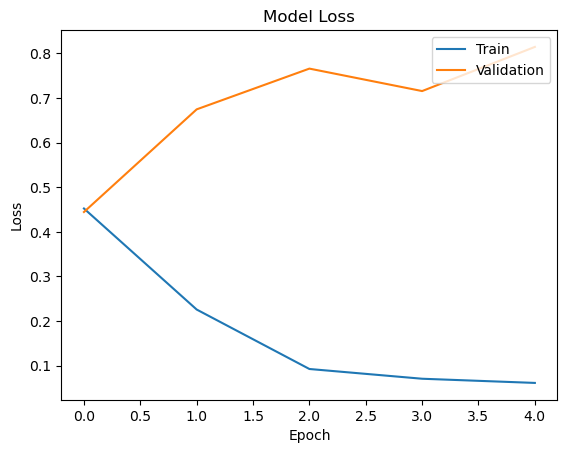

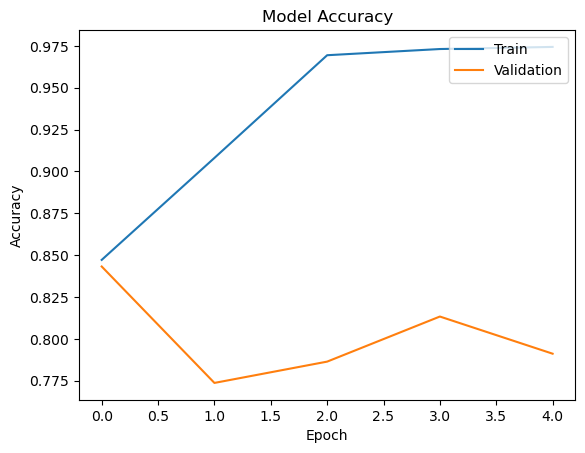

In [135]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [136]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8008 - loss: 0.7469
Validation Loss: 0.8153405785560608
Validation Accuracy: 0.7911242842674255


In [137]:
predictions = model.predict(X_test)

160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [139]:
predictions = model.predict(X_test)
predicted_labels = [1 if prediction > 0.5 else 0 for prediction in predictions]

160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [142]:
predictions_df = pd.DataFrame({'doc_id': test_df['doc_id'], 'predicted_relevance': predicted_labels})

In [143]:
predictions_df.to_csv('predictions.csv', index=False)

In [145]:

predictions_df.rename(columns={'doc_id': 'ID'}, inplace=True)

In [146]:
predictions_df.to_csv('predictions1.csv', index=False)

In [159]:
train_df.shape[0]
      

21120

In [160]:
test_df.shape[0]

5113

In [162]:
predictions_df = predictions_df.drop_duplicates()


In [163]:
predictions_df.shape[0]

5058